In [126]:
import json 
file_path = 'label.json'
f = open(file_path)
label = json.load(f)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from datetime import datetime, timezone
import ast  
from collections import defaultdict

In [4]:
label 

{'whale': ['0x04ffb838944173629b5ecee49f1043a29fbf1d8c',
  '0x05271853224d839a9bc6a342f27821e7fb32b001',
  '0x05936f6a5ea9abfbfcc690f1a6140d97e80640f9',
  '0x075e72a5edf65f0a5f44699c7654c1a76941ddc8',
  '0x09b176b1a97acbd5390dc6e35b91676e139676f1',
  '0x0afc1a3f10a803ac13adc12adf00774aefc3fd6d',
  '0x0b8f4c4e7626a91460dac057eb43e0de59d5b44f',
  '0x0c02d56f802ba2f79bfccd91b921a18f3df49ed0',
  '0x0ca99c61fc169d131ba890433792483ebe0ecd1a',
  '0x0f576fe0a916ca39ee929f0cc956cfc9d2a59c12',
  '0x11b0389a7b1545ef15c8e7395128301e81952bc3',
  '0x15a28143497dad2c24302baa58ee0cf4447db8f7',
  '0x179755e1b74fd8738e77388337a738d774e3b451',
  '0x1b47d8abfcec8b9de3d866f286d59d64c4d29d0b',
  '0x20d5734664e33b1789d1e409f7f797d403ed1673',
  '0x2164ed9f5e0ac69546205104f23e5be32d3181bd',
  '0x23048d7d24c62f1287fa6c21e88b8bc96076bdf5',
  '0x24488d5f053ab0e21c8add6dc7bf082aaaf5b68e',
  '0x258ede9f27da4922efd8543d6c49a6fa98ab842f',
  '0x25f430a7bd45b1fa42d39601c8106835d798d8c9',
  '0x2d6054c54c6e98dc90ba894848

In [127]:
label.keys()

dict_keys(['whale', 'big_team', 'bot', 'p2p_user', 'inactive_user', 'active_user'])

In [128]:
label_dict = []
for label_type, addresses in label.items():
    for address in addresses:
        label_dict.append({"user": address, "label": label_type.title()})  # Capitalizing the label

# Create a DataFrame from the transformed data
label_df = pd.DataFrame(label_dict)

# Print the DataFrame
label_df.head()

,user,label
0,0x04ffb838944173629b5ecee49f1043a29fbf1d8c,Whale
1,0x05271853224d839a9bc6a342f27821e7fb32b001,Whale
2,0x05936f6a5ea9abfbfcc690f1a6140d97e80640f9,Whale
3,0x075e72a5edf65f0a5f44699c7654c1a76941ddc8,Whale
4,0x09b176b1a97acbd5390dc6e35b91676e139676f1,Whale


In [129]:
label_df.shape

(66801, 2)

In [16]:
# Specify the file path
label_df.to_csv("label_wallets.csv")

In [18]:
for i in label.keys():
    print(i,": ", len(label[i]))

whale :  108
big_team :  270
bot :  8743
p2p_user :  5927
inactive_user :  29137
active_user :  22616


In [19]:
contract_interact = pd.read_parquet('contract_interact.parquet', engine='pyarrow')
user_frequency = pd.read_parquet('user_frequency.parquet', engine='pyarrow')
user_info = pd.read_parquet('user_info_filter_asset.parquet', engine='pyarrow')
user_interact = pd.read_parquet('user_interact.parquet', engine='pyarrow')


In [20]:
list_of_tables = [contract_interact, user_info, user_interact, user_frequency]

In [21]:
whale = label["whale"]
big_team = label["big_team"]
bot = label["bot"]
p2p_user = label["p2p_user"]
inactive_user = label["inactive_user"]
active_user = label["active_user"]

## Contract

In [23]:
whale_contract_interact = contract_interact[contract_interact['user'].isin(whale)]
big_team_contract_interact = contract_interact[contract_interact['user'].isin(big_team)]
bot_contract_interact = contract_interact[contract_interact['user'].isin(bot)]
p2p_user_contract_interact = contract_interact[contract_interact['user'].isin(p2p_user)]
inactive_user_contract_interact = contract_interact[contract_interact['user'].isin(inactive_user)]
active_user_contract_interact = contract_interact[contract_interact['user'].isin(active_user)]

In [25]:
type_contract_interact = [whale_contract_interact, big_team_contract_interact, 
                        bot_contract_interact, p2p_user_contract_interact, inactive_user_contract_interact, active_user_contract_interact]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


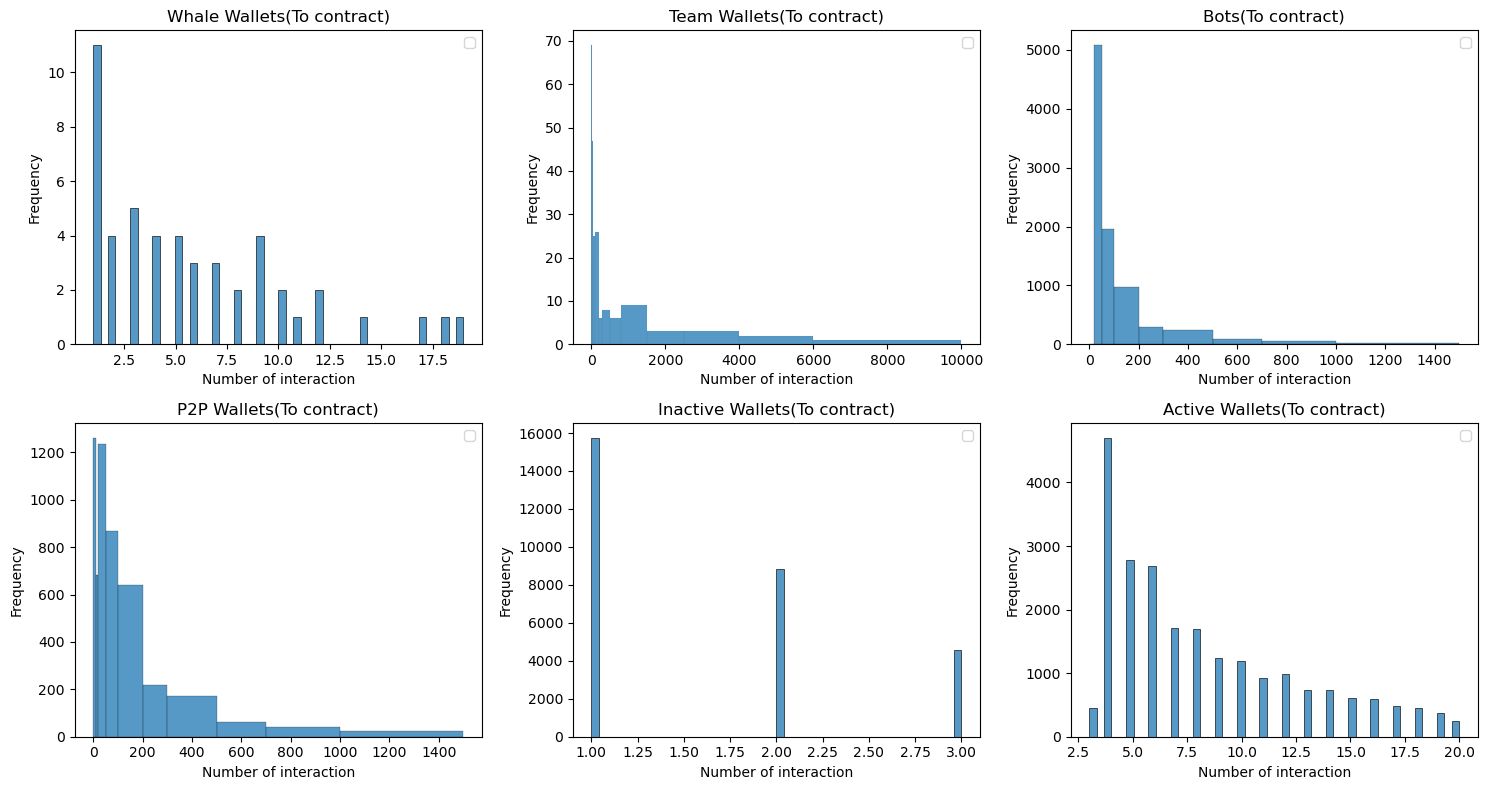

In [134]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# List of titles, x-labels, and y-labels for each subplot
titles = ['Whale Wallets', 'Team Wallets', 'Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

# Iterate through each subplot
for i, ax in enumerate(axes):
    # Filter data for each subplot (assuming you have a categorical variable 'group' to group by)
    if i == 1:
        custom_bins = [0, 10, 20, 50, 100, 200, 300, 500, 800, 1500, 2500, 4000, 6000, 10000]
    elif i == 2:
        custom_bins = [0, 10, 20, 50, 100, 200, 300, 500, 700, 1000, 1500]
    elif i == 3:
        custom_bins = [0, 10, 20, 50, 100, 200, 300, 500, 700, 1000, 1500]
    else:
        custom_bins = 50

    subset_data = type_contract_interact[i].groupby('user')['count'].sum().reset_index()
    
    # Plot histogram
    sns.histplot(subset_data['count'], bins =custom_bins, ax=ax)
    
    # Add title, x-label, y-label, and legend
    ax.set_title(titles[i] + "(To contract)")
    ax.set_xlabel("Number of interaction")
    ax.set_ylabel("Frequency")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


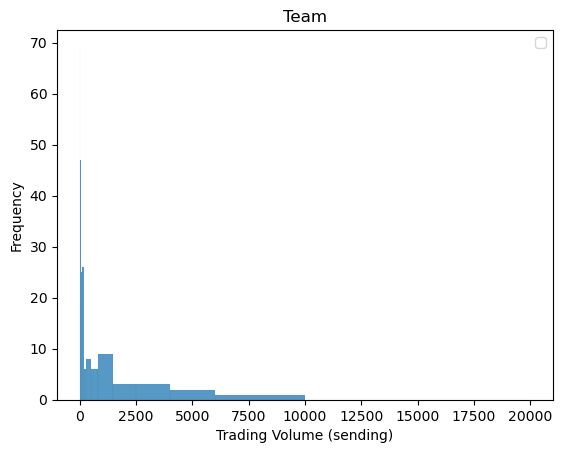

In [133]:
custom_bins = [0, 10, 20, 50, 100, 200, 300, 500, 800, 1500, 2500, 4000, 6000, 10000, 20000]
subset_data = type_contract_interact[1].groupby('user')['count'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['count'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("Team")
plt.xlabel("Trading Volume (sending)")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


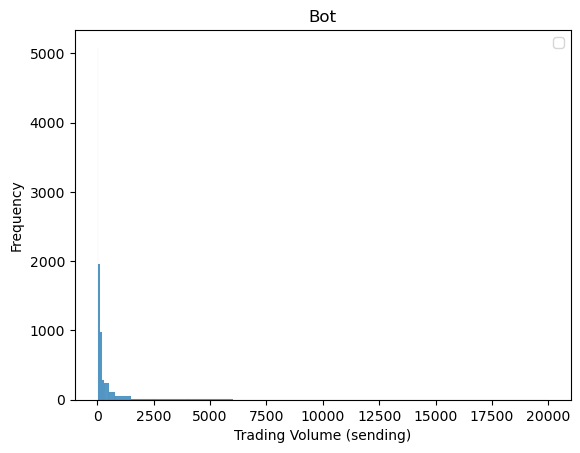

In [81]:
custom_bins = [0, 10, 20, 50, 100, 200, 300, 500, 800, 1500, 2500, 4000, 6000, 10000, 20000]
subset_data = type_contract_interact[2].groupby('user')['count'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['count'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("Bot")
plt.xlabel("Trading Volume (sending)")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


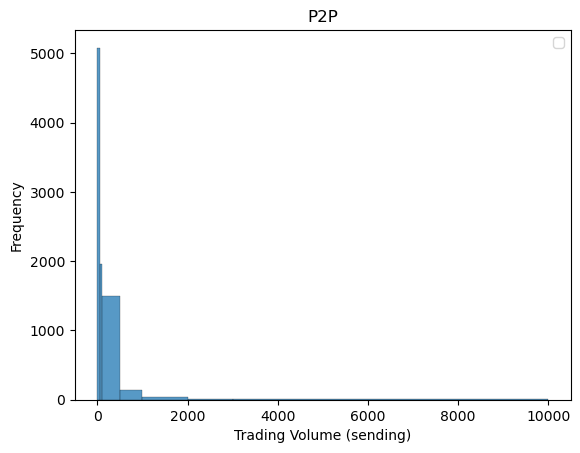

In [83]:
custom_bins = [0, 50, 100, 500, 1000, 2000, 3000, 10000]
subset_data = type_contract_interact[2].groupby('user')['count'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['count'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("P2P")
plt.xlabel("Trading Volume (sending)")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

In [30]:
def mean_user_interaction_contract(label):
    x = label.groupby('user')['count'].sum().reset_index()["count"].mean()
    return x

label_names = ['Whale Wallets', 'Team Wallets', 'Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

for idx, label in enumerate(type_contract_interact):
    print(label_names[idx], "- Average number of interaction (to contracts): ", mean_user_interaction_contract(label))
    

Whale Wallets - Average number of interaction (to contracts):  5.795918367346939
Team Wallets - Average number of interaction (to contracts):  372.1377777777778
Bots - Average number of interaction (to contracts):  98.39768958023562
P2P Wallets - Average number of interaction (to contracts):  108.02441350371924
Inactive Wallets - Average number of interaction (to contracts):  1.615574698836531
Active Wallets - Average number of interaction (to contracts):  8.312256809338521


## User Info

In [31]:
whale_user_info = user_info[user_info['user'].isin(whale)]
big_team_user_info = user_info[user_info['user'].isin(big_team)]
bot_user_info = user_info[user_info['user'].isin(bot)]
p2p_user_user_info = user_info[user_info['user'].isin(p2p_user)]
inactive_user_user_info = user_info[user_info['user'].isin(inactive_user)]
active_user_user_info = user_info[user_info['user'].isin(active_user)]

In [32]:
type_user_info = [whale_user_info, big_team_user_info, 
                bot_user_info, p2p_user_user_info, inactive_user_user_info, active_user_user_info]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


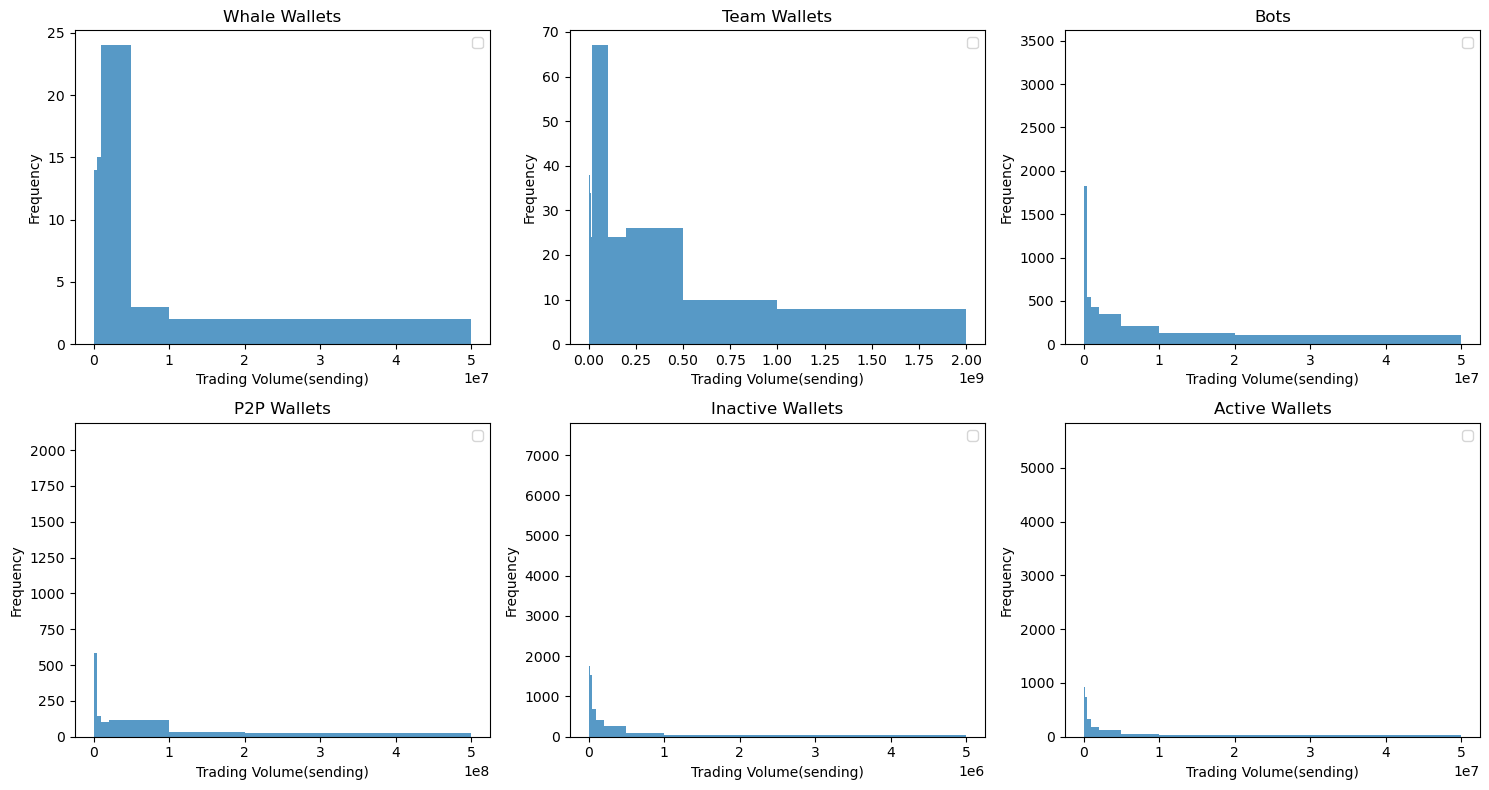

In [136]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# List of titles, x-labels, and y-labels for each subplot
titles = ['Whale Wallets', 'Team Wallets', 'Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

# Iterate through each subplot
for i, ax in enumerate(axes):
    # Filter data for each subplot (assuming you have a categorical variable 'group' to group by)

    if i == 0:
        custom_bins = [0, 100, 1000, 1e4, 5e4, 1e5, 5e5, 1e6, 5e6, 1e7, 2e7, 5e7]
    elif i == 1:
        custom_bins = [0, 100, 1000, 1e4, 1e5, 1e6, 5e6, 1e7, 2e7, 1e8, 2e8, 5e8, 1e9, 2e9]
    elif i == 2:
        custom_bins = [0, 100, 1000, 1e4, 1e5, 5e5, 1e6, 2e6, 5e6, 1e7, 2e7, 5e7]
    elif i == 3:
        custom_bins = [0, 100, 1000, 1e4, 1e5, 1e6, 5e6, 1e7, 2e7, 1e8, 2e8, 5e8]
    elif i == 4:
        custom_bins = [0, 100, 1000, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5, 5e5, 1e6, 2e6, 5e6]
    elif i == 5:
        custom_bins = [0, 100, 1000, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5, 5e5, 1e6, 2e6, 5e6, 1e7, 5e7]

    subset_data = type_user_info[i][type_user_info[i]["volume_type"]=="sending"].groupby('user')['priceInUSD'].sum().reset_index()
    
    # Plot histogram
    sns.histplot(subset_data['priceInUSD'], bins =custom_bins, ax=ax)
    
    # Add title, x-label, y-label, and legend
    ax.set_title(titles[i])
    ax.set_xlabel("Trading Volume(sending)")
    ax.set_ylabel("Frequency")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


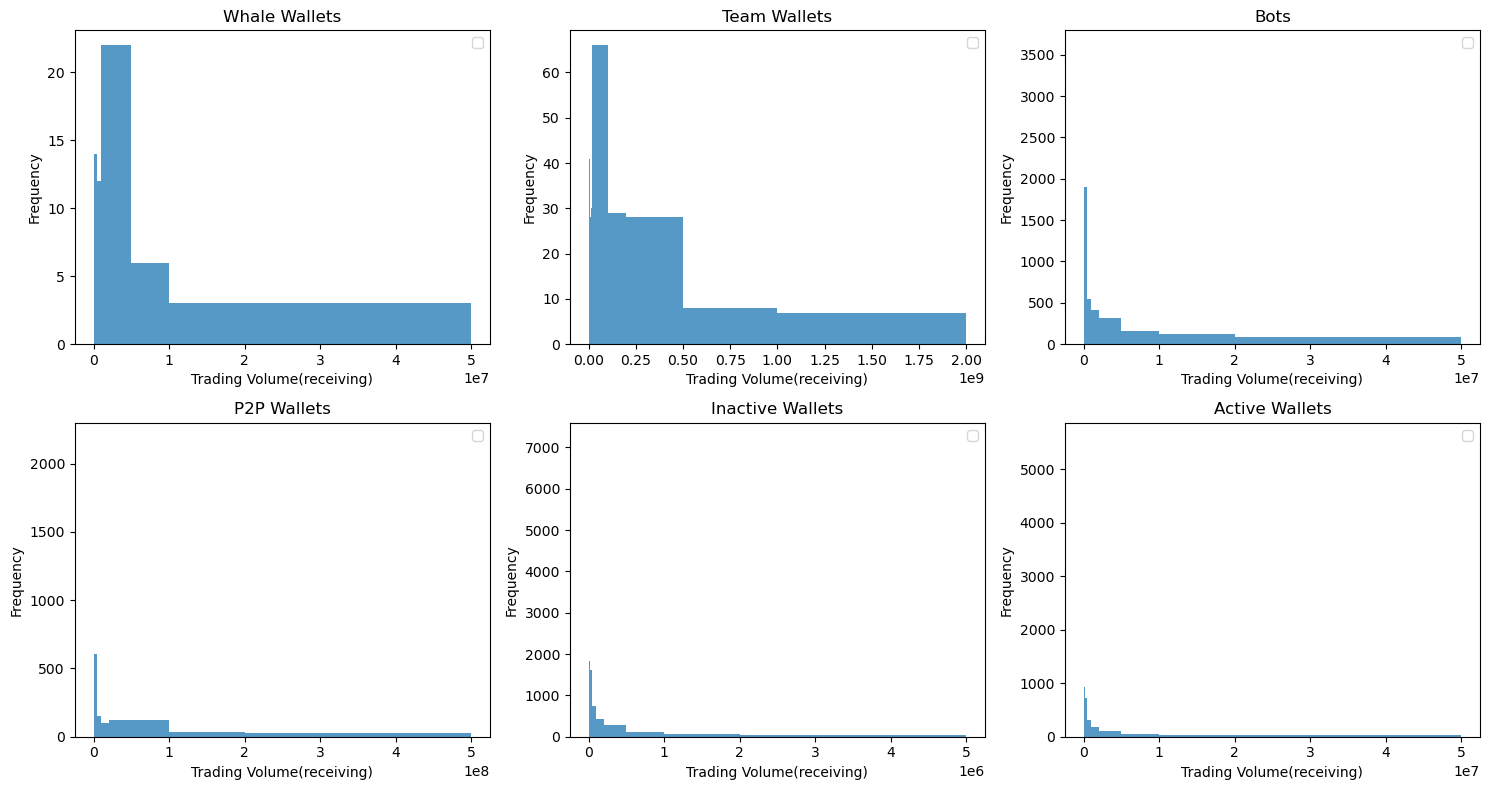

In [137]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# List of titles, x-labels, and y-labels for each subplot
titles = ['Whale Wallets', 'Team Wallets', 'Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

# Iterate through each subplot
for i, ax in enumerate(axes):

    if i == 0:
        custom_bins = [0, 100, 1000, 1e4, 5e4, 1e5, 5e5, 1e6, 5e6, 1e7, 2e7, 5e7]
    elif i == 1:
        custom_bins = [0, 100, 1000, 1e4, 1e5, 1e6, 5e6, 1e7, 2e7, 1e8, 2e8, 5e8, 1e9, 2e9]
    elif i == 2:
        custom_bins = [0, 100, 1000, 1e4, 1e5, 5e5, 1e6, 2e6, 5e6, 1e7, 2e7, 5e7]
    elif i == 3:
        custom_bins = [0, 100, 1000, 1e4, 1e5, 1e6, 5e6, 1e7, 2e7, 1e8, 2e8, 5e8]
    elif i == 4:
        custom_bins = [0, 100, 1000, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5, 5e5, 1e6, 2e6, 5e6]
    elif i == 5:
        custom_bins = [0, 100, 1000, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5, 5e5, 1e6, 2e6, 5e6, 1e7, 5e7]

    # Filter data for each subplot (assuming you have a categorical variable 'group' to group by)
    subset_data = type_user_info[i][type_user_info[i]["volume_type"]=="receiving"].groupby('user')['priceInUSD'].sum().reset_index()
    
    # Plot histogram
    sns.histplot(subset_data['priceInUSD'], bins =custom_bins, ax=ax)
    
    # Add title, x-label, y-label, and legend
    ax.set_title(titles[i])
    ax.set_xlabel("Trading Volume(receiving)")
    ax.set_ylabel("Frequency")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


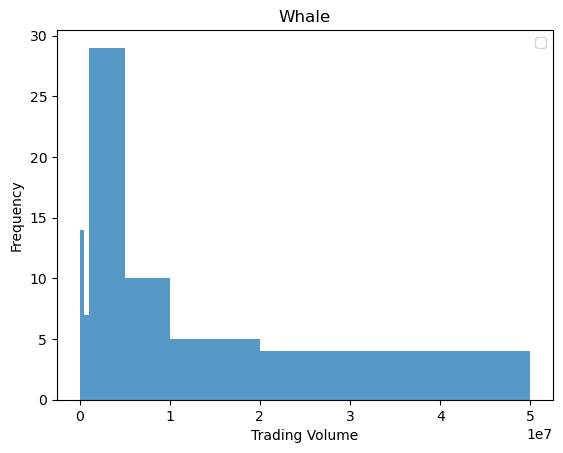

In [91]:
custom_bins = [0, 100, 1000, 1e4, 5e4, 1e5, 5e5, 1e6, 5e6, 1e7, 2e7, 5e7]
subset_data = type_user_info[0].groupby('user')['priceInUSD'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['priceInUSD'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("Whale")
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


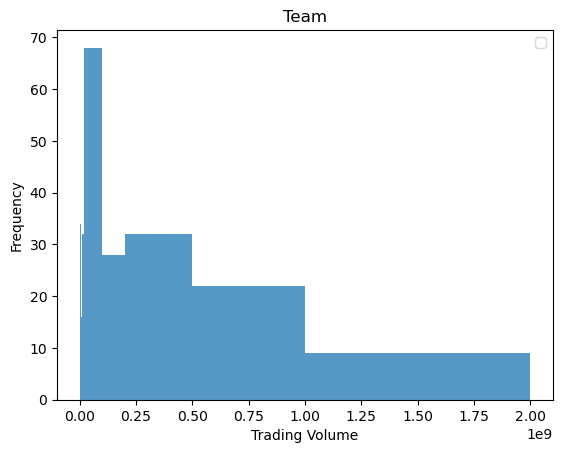

In [98]:
custom_bins = [0, 100, 1000, 1e4, 1e5, 1e6, 5e6, 1e7, 2e7, 1e8, 2e8, 5e8, 1e9, 2e9]
subset_data = type_user_info[1].groupby('user')['priceInUSD'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['priceInUSD'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("Team")
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


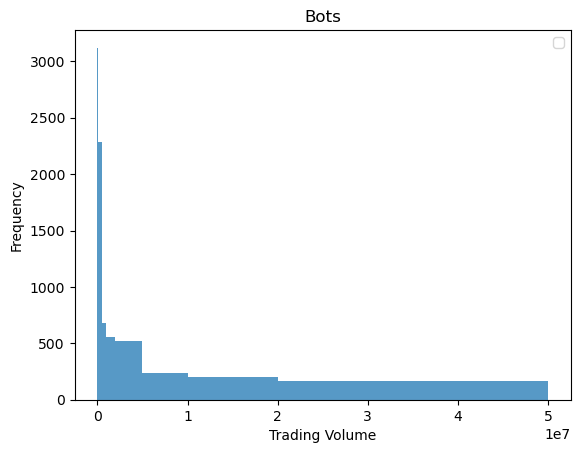

In [100]:
custom_bins = [0, 100, 1000, 1e4, 1e5, 5e5, 1e6, 2e6, 5e6, 1e7, 2e7, 5e7]
subset_data = type_user_info[2].groupby('user')['priceInUSD'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['priceInUSD'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("Bots")
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


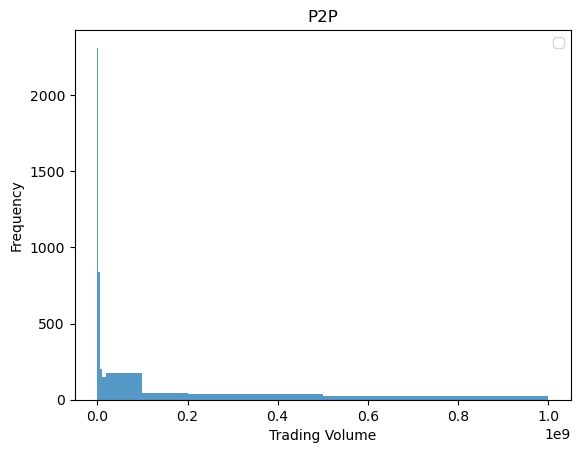

In [101]:
custom_bins = [0, 100, 1000, 1e4, 1e5, 1e6, 5e6, 1e7, 2e7, 1e8, 2e8, 5e8, 1e9]
subset_data = type_user_info[3].groupby('user')['priceInUSD'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['priceInUSD'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("P2P")
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


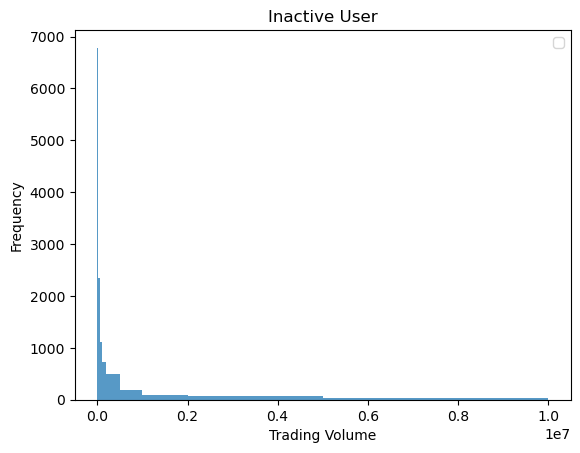

In [105]:
custom_bins = [0, 100, 1000, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5, 5e5, 1e6, 2e6, 5e6, 1e7]
subset_data = type_user_info[4].groupby('user')['priceInUSD'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['priceInUSD'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("Inactive User")
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


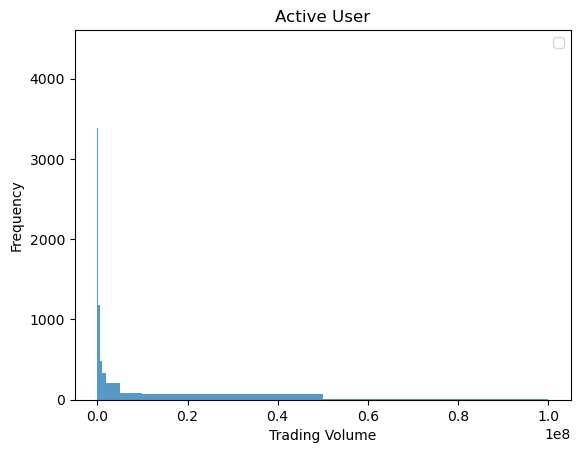

In [108]:
custom_bins = [0, 100, 1000, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5, 5e5, 1e6, 2e6, 5e6, 1e7, 5e7, 1e8]
subset_data = type_user_info[5].groupby('user')['priceInUSD'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['priceInUSD'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("Active User")
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

In [132]:
def mean_trading_vol(label):
    x = label.groupby('user')['priceInUSD'].sum().reset_index()["priceInUSD"].median()
    return x

label_names = ['Whale Wallets', 'Team Wallets', 'Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

for idx, label in enumerate(type_user_info):
    print(label_names[idx], "- Average amount of money per Transaction: ", mean_trading_vol(label), "USD")
    

Whale Wallets - Average amount of money per Transaction:  775163.7265191769 USD
Team Wallets - Average amount of money per Transaction:  48777739.241988555 USD
Bots - Average amount of money per Transaction:  130362.0102844463 USD
P2P Wallets - Average amount of money per Transaction:  202921.5227573828 USD
Inactive Wallets - Average amount of money per Transaction:  1857.9714922807123 USD
Active Wallets - Average amount of money per Transaction:  11803.22387032882 USD


## User Frequency

In [46]:
whale_user_frequency = user_frequency[user_frequency['user'].isin(whale)]
big_team_user_frequency = user_frequency[user_frequency['user'].isin(big_team)]
bot_user_frequency = user_frequency[user_frequency['user'].isin(bot)]
p2p_user_user_frequency = user_frequency[user_frequency['user'].isin(p2p_user)]
inactive_user_user_frequency = user_frequency[user_frequency['user'].isin(inactive_user)]
active_user_user_frequency = user_frequency[user_frequency['user'].isin(active_user)]

In [47]:
type_user_frequency = [whale_user_frequency, big_team_user_frequency, 
                        bot_user_frequency, p2p_user_user_frequency, inactive_user_user_frequency, active_user_user_frequency]

In [48]:
hours = [i for i in range(24)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


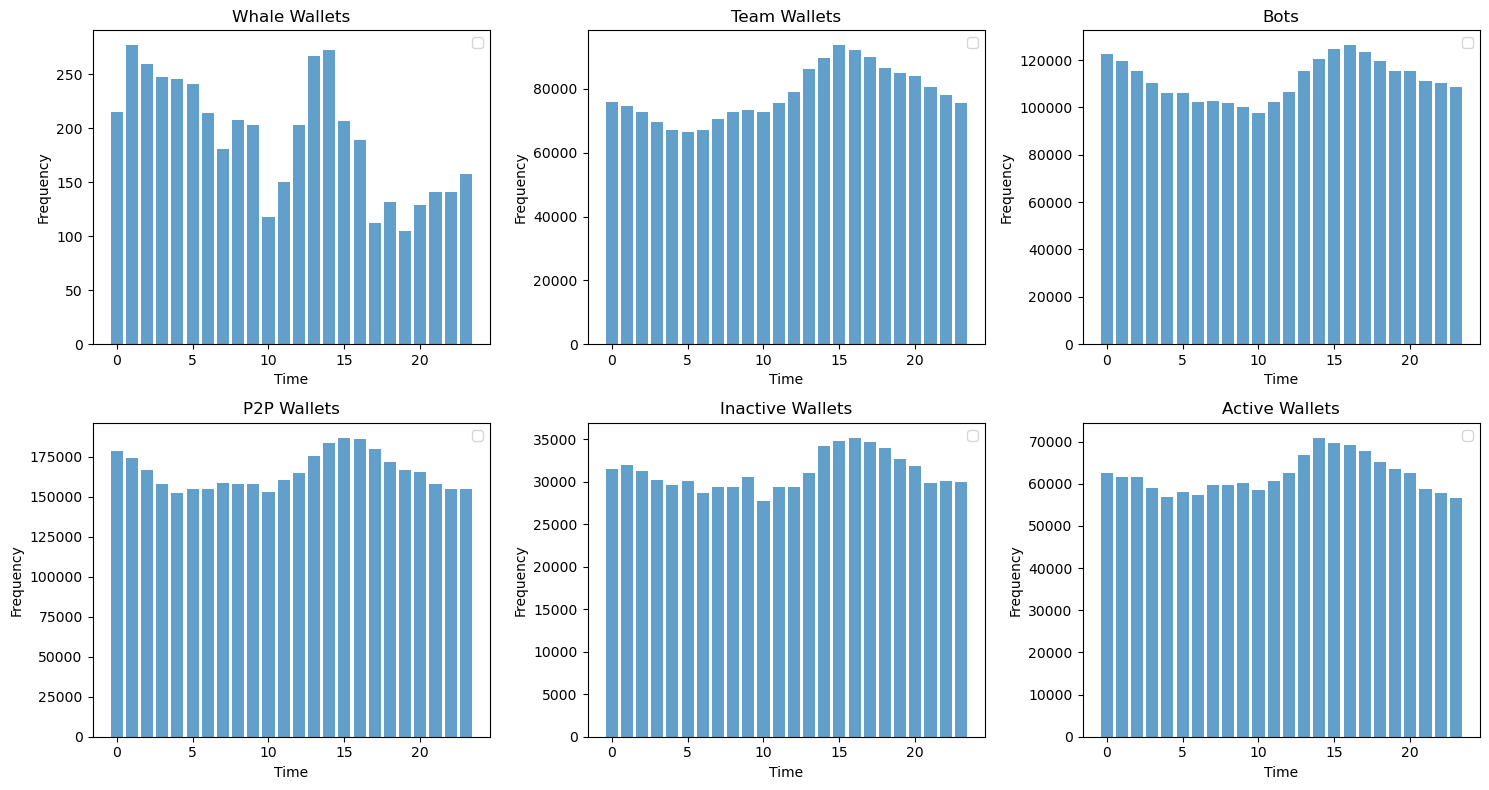

In [64]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# List of titles, x-labels, and y-labels for each subplot
titles = ['Whale Wallets', 'Team Wallets', 'Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

# Iterate through each subplot
for i, ax in enumerate(axes):
    sum_time_freq = np.sum(type_user_frequency[i]['time_frequency'].values, axis=0)
    ax.bar(hours, sum_time_freq, alpha=0.7)
    
    # Add title, x-label, y-label, and legend
    ax.set_title(titles[i])
    ax.set_xlabel("Time")
    ax.set_ylabel("Frequency")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

## User Interact

In [50]:
whale_user_interact = user_interact[user_interact['user'].isin(whale)]
big_team_user_interact = user_interact[user_interact['user'].isin(big_team)]
bot_user_interact = user_interact[user_interact['user'].isin(bot)]
p2p_user_user_interact = user_interact[user_interact['user'].isin(p2p_user)]
inactive_user_user_interact = user_interact[user_interact['user'].isin(inactive_user)]
active_user_user_interact = user_interact[user_interact['user'].isin(active_user)]

In [51]:
type_user_interact = [whale_user_interact, big_team_user_interact, 
                        bot_user_interact, 
                        p2p_user_user_interact, inactive_user_user_interact, active_user_user_interact]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


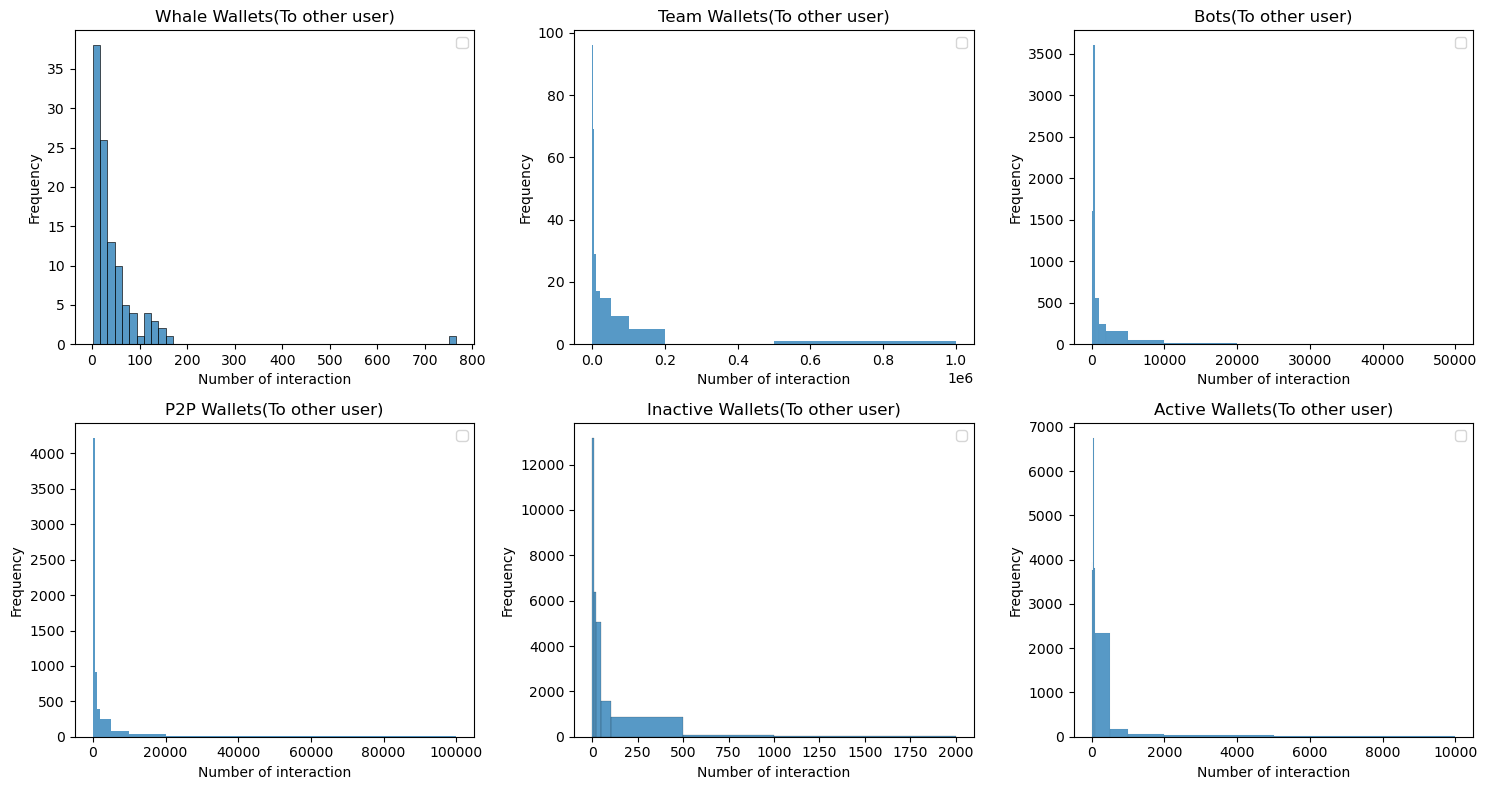

In [138]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# List of titles, x-labels, and y-labels for each subplot
titles = ['Whale Wallets', 'Team Wallets', 'Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

# Iterate through each subplot
for i, ax in enumerate(axes):
    # Filter data for each subplot (assuming you have a categorical variable 'group' to group by)

    if i == 0:
        custom_bins = 50
    elif i == 1:
        custom_bins = [0, 100, 1000, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5, 5e5, 1e6]
    elif i == 2:
        custom_bins = [0, 10, 20, 50, 100, 500, 1000, 2000, 5e3, 1e4, 2e4, 5e4]
    elif i == 3:
        custom_bins = [0, 10, 20, 50, 100, 500, 1000, 2000, 5e3, 1e4, 2e4, 5e4, 1e5]
    elif i == 4:
        custom_bins = [0, 10, 20, 50, 100, 500, 1000, 2000]
    elif i == 5:
        custom_bins = [0, 10, 20, 50, 100, 500, 1000, 2000, 5e3, 1e4]
    
    subset_data = type_user_interact[i].groupby('user')['count'].sum().reset_index()
    
    # Plot histogram
    sns.histplot(subset_data['count'], bins =custom_bins, ax=ax)
    
    # Add title, x-label, y-label, and legend
    ax.set_title(titles[i] + "(To other user)")
    ax.set_xlabel("Number of interaction")
    ax.set_ylabel("Frequency")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [53]:
def mean_user_interaction(label):
    x = label.groupby('user')['count'].sum().reset_index()["count"].mean()
    return x

label_names = ['Whale Wallets', 'Team Wallets', 'Bots', 'P2P Wallets', 'Inactive Wallets', 'Active Wallets']

for idx, label in enumerate(type_user_interact):
    print(label_names[idx], "- Average number of interaction (to other users): ", mean_user_interaction(label))
    

Whale Wallets - Average number of interaction (to other users):  45.5
Team Wallets - Average number of interaction (to other users):  12353.488888888889
Bots - Average number of interaction (to other users):  403.3465180390747
P2P Wallets - Average number of interaction (to other users):  889.5164501434115
Inactive Wallets - Average number of interaction (to other users):  33.380235674167615
Active Wallets - Average number of interaction (to other users):  96.1846881268507


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


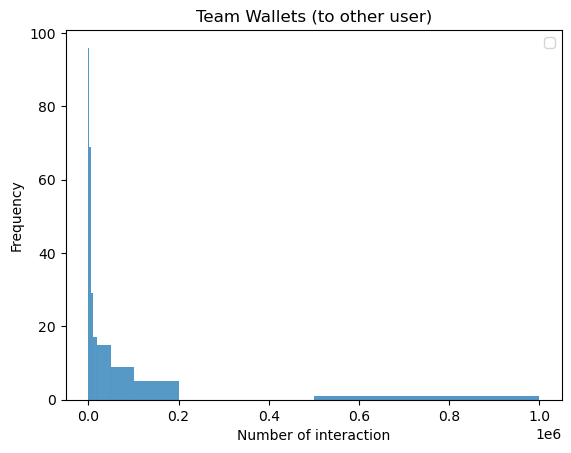

In [114]:
custom_bins = [0, 100, 1000, 5e3, 1e4, 2e4, 5e4, 1e5, 2e5, 5e5, 1e6]
subset_data = type_user_interact[1].groupby('user')['count'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['count'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("Team Wallets (to other user)")
plt.xlabel("Number of interaction")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


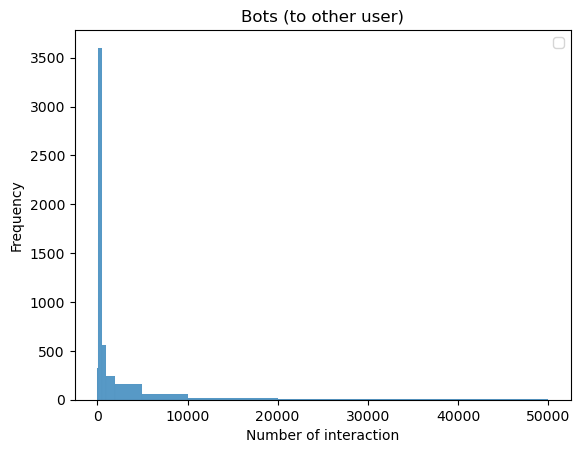

In [116]:
custom_bins = [0, 10, 20, 50, 100, 500, 1000, 2000, 5e3, 1e4, 2e4, 5e4]
subset_data = type_user_interact[2].groupby('user')['count'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['count'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("Bots (to other user)")
plt.xlabel("Number of interaction")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


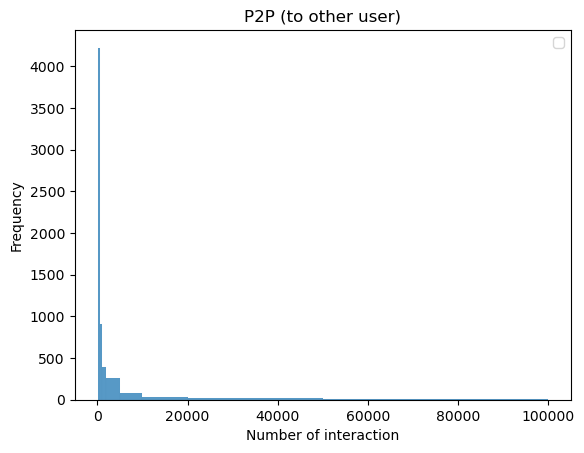

In [118]:
custom_bins = [0, 10, 20, 50, 100, 500, 1000, 2000, 5e3, 1e4, 2e4, 5e4, 1e5]
subset_data = type_user_interact[3].groupby('user')['count'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['count'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("P2P (to other user)")
plt.xlabel("Number of interaction")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


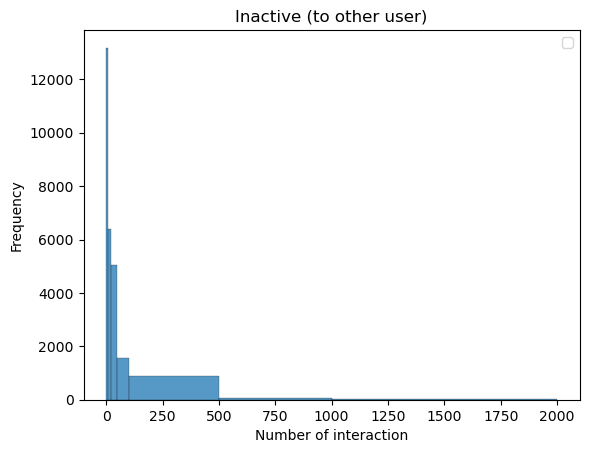

In [121]:
custom_bins = [0, 10, 20, 50, 100, 500, 1000, 2000]
subset_data = type_user_interact[4].groupby('user')['count'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['count'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("Inactive (to other user)")
plt.xlabel("Number of interaction")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


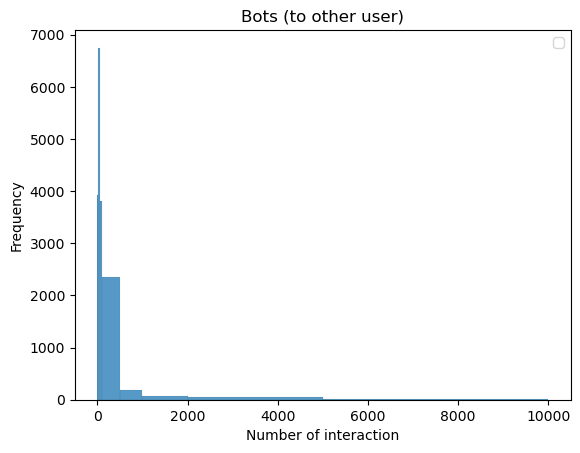

In [122]:
custom_bins = [0, 10, 20, 50, 100, 500, 1000, 2000, 5e3, 1e4]
subset_data = type_user_interact[5].groupby('user')['count'].sum().reset_index()
# Plot histogram with custom bins
sns.histplot(subset_data['count'], bins=custom_bins)

# Add title, x-label, y-label, and legend
plt.title("Bots (to other user)")
plt.xlabel("Number of interaction")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()